# Imports

In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.utils import plot_model
import tensorflow as tf

# Load dataset

In [15]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "../data/input/train/",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y)) # Normalize the images

Found 10000 files belonging to 10 classes.


In [16]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/input/val",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y)) # Normalize the images

Found 1000 files belonging to 10 classes.


# A basic architecture

In [27]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(16, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(8, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

/home/raul/Master_Big_Data/Datos_No_Estructurados/tomato_disease/tld_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 85, 85, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,554 (45.13 KB)

 Trainable params: 11,554 (45.13 KB)

 Non-trainable params: 0 (0.00 B)

# Fitting...

In [30]:
history = model.fit(train_data, epochs=100, validation_data=val_data)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.1142 - loss: 2.2686 - val_accuracy: 0.2960 - val_loss: 1.8601
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.2887 - loss: 1.8506 - val_accuracy: 0.4540 - val_loss: 1.4436
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 87ms/step - accuracy: 0.4582 - loss: 1.4946 - val_accuracy: 0.5220 - val_loss: 1.3445
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.5419 - loss: 1.2902 - val_accuracy: 0.6180 - val_loss: 1.1021
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5890 - loss: 1.1619 - val_accuracy: 0.6460 - val_loss: 1.0379
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.6234 - loss: 1.0551 - val_accuracy: 0.6910 - val_loss: 0.9096
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.6657 - loss: 0.9525 - val_accuracy: 0.7210 - val_loss: 0.8368
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.6872 - loss: 0

# Saving the model

In [31]:
model.save("../models/basic_model_from_scratch_100.h5")

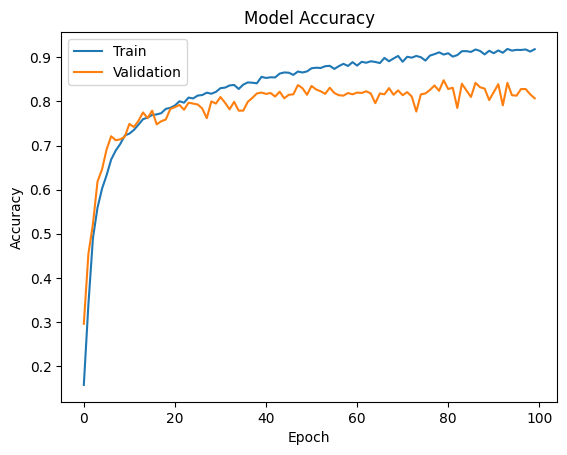

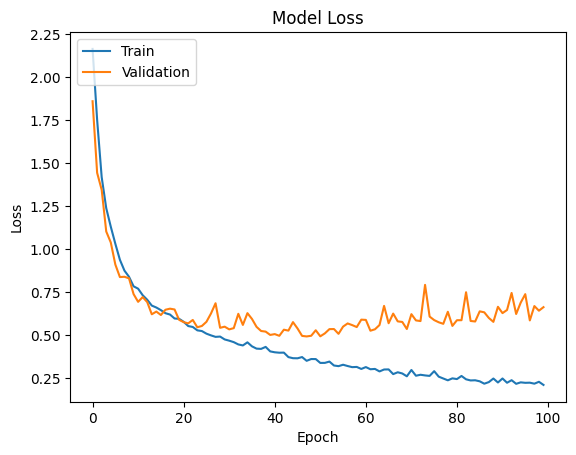

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Saving history to `csv`

In [33]:
import pandas as pd

df = pd.DataFrame(history.history)
df.to_csv("../data/output/basic_model_from_scratch_100.csv")

In [37]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "../data/input/val/",
    labels="inferred",
    label_mode="categorical",
    image_size=(256, 256),
    batch_size=32)

classes = train_data.class_names

Found 1000 files belonging to 10 classes.


In [38]:
classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Evaluating the model

In [39]:
# Now we can use the model to make predictions on new images
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(val_data)
print("test loss, test acc:", results)

Evaluate on test data
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8037 - loss: 0.7006
test loss, test acc: [0.6616954803466797, 0.8069999814033508]


# Conclusion

